In [1]:
from spoiled_broth.rl.game_env import GameEnv
import supersuit as ss
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.callbacks import BaseCallback
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rl_model = 'PPO'
map_nr = 1

In [3]:
save_path = Path(f"spoiled_broth/rl/saved_models/{rl_model}_spoiled_broth-map_{map_nr}/")
save_path.mkdir(parents=True, exist_ok=True)

In [4]:
class RewardPlotCallback(BaseCallback):
    def __init__(self, check_freq=1000, verbose=1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.episode_rewards = []
        self.steps = []
        self.current_rewards = []

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            mean_reward = np.mean(self.locals["rewards"])
            self.episode_rewards.append(mean_reward)
            print(f"[Step {self.n_calls}] Mean reward: {mean_reward:.3f}")

        return True

    def plot_rewards(self):
        plt.plot(range(0, len(self.episode_rewards)*self.check_freq, self.check_freq), self.episode_rewards)
        plt.xlabel("Steps")
        plt.ylabel("Mean reward")
        plt.title("Learning Curve")
        plt.show()

In [5]:
reward_weights = {
    "ai_rl_1": (0.5, 0.5),  # agent 1 is cooperative
    "ai_rl_2": (0.8, -0.2),  # agent 2 is competitive
}

env = GameEnv(reward_weights=reward_weights, map_nr=map_nr)
env = ss.pad_observations_v0(env)
env = ss.pad_action_space_v0(env)
env = ss.pettingzoo_env_to_vec_env_v1(env)
env = ss.concat_vec_envs_v1(env, 4, num_cpus=4, base_class="stable_baselines3")
print(f'Number of environments: {env.num_envs}')

Weighted rewards:

Agent 1: (0.5, 0.5)

Agent 2: (0.8, -0.2)



Number of environments: 8


Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 2
Agent delivered item, new score: 1
Agent delivered item, new score: 2
Agent delivered item, new score: 3
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 2
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 2
Agent delivered item, new score: 3
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item, new score: 1
Agent delivered item

In [ ]:
Algorithm = PPO

#print("Cargando modelo existente...")
#model = Algorithm.load(save_path, env=env)

model = Algorithm("MlpPolicy", env, ent_coef=0.05, verbose=1)

reward_callback = RewardPlotCallback(check_freq=2000)

print("Empezando entrenamiento...")
model.learn(total_timesteps=300_000*env.num_envs, callback=reward_callback)

model.save(str(save_path))
print(f"✅ Modelo guardado en {save_path}")

Using cuda device


/home/samuel_lozano/anaconda3/envs/cooked/lib/python3.13/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Empezando entrenamiento...
[Step 2000] Mean reward: -0.046
------------------------------
| time/              |       |
|    fps             | 1134  |
|    iterations      | 1     |
|    time_elapsed    | 14    |
|    total_timesteps | 16384 |
------------------------------
[Step 4000] Mean reward: -0.048
-----------------------------------------
| time/                   |             |
|    fps                  | 762         |
|    iterations           | 2           |
|    time_elapsed         | 42          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.010832679 |
|    clip_fraction        | 0.0847      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.15       |
|    explained_variance   | -0.0115     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.207      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00738    |
|    value_loss     

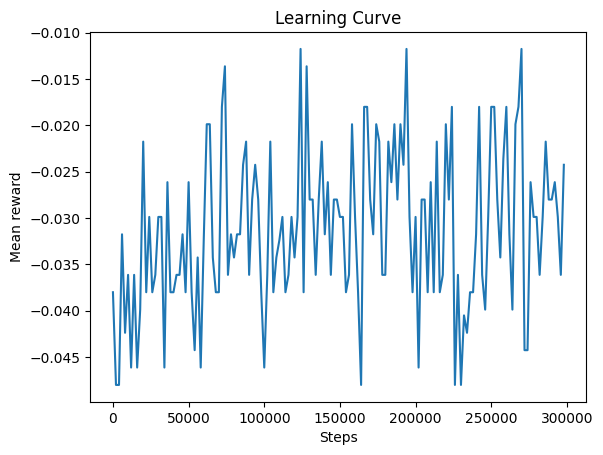

In [ ]:
# Graficar las recompensas al finalizar

reward_callback.plot_rewards()